# <center>GRIP - The Sparks Foundation</center>
<img src='https://media.glassdoor.com/sqll/2143300/the-sparks-foundation-squarelogo-1556515236044.png' width="100" height="100">
 <center><font color=7E4456>Data Science and Business Analytics Internship</font></center>  
<center><font color=7E4456>By Vaibhav Sarvadaman Ghadiali</font></center>

<font color=155E64>Prediction using Supervised ML</font>

<font color=155E64>(Level - Beginner)</font>

<font color=155E64>Task 1 : Simple Linear Regression</font>

<font color=155E64>Problem Statement: Predict the percentage of marks of a student based on the number of hours studied</font>




Importing all required libraries

In [1]:
import numpy as np # mathematical computation on arrays and matrices 
import seaborn as sns # visualisation
import pandas as pd
import matplotlib.pyplot as plt  # visualisation
%matplotlib inline

Uploading the data and converting it into dataframes


In [2]:
urls = "http://bit.ly/w-data"
df = pd.read_csv(urls)
df.head() #to view the first few rows of our data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Data description

In [3]:
df.shape #total number of rows and columns in our dataset

(25, 2)

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info() #describes the datatype values in each column specifying the null and not null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Data Visualization

Plotting a scatter plot in order to understand the relationship between the number of hours studied and marks obtained by the student.


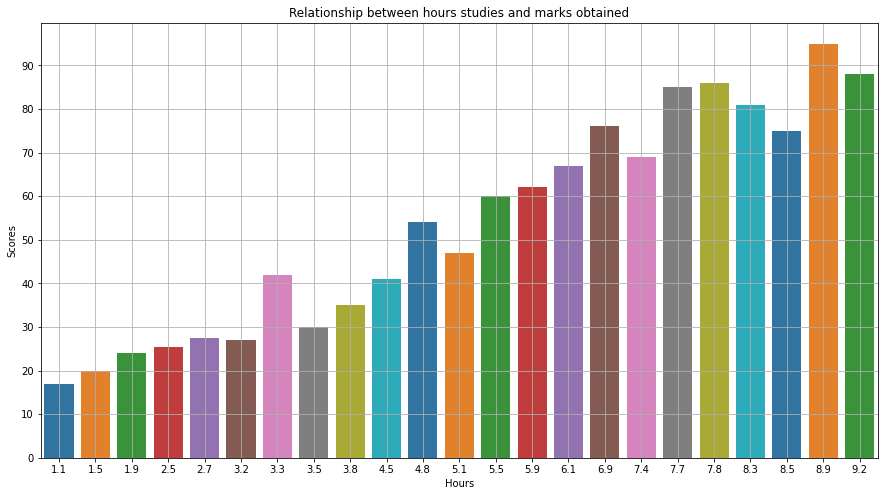

In [6]:
fig=plt.figure(figsize=(15,8))
plt.title('Relationship between hours studies and marks obtained')
plt.yticks(np.arange(0, 100,10))
sns.barplot(x=df['Hours'], y=df['Scores'], data=df,ci = None, palette = "tab10")
sns.set_context("talk")
plt.grid()

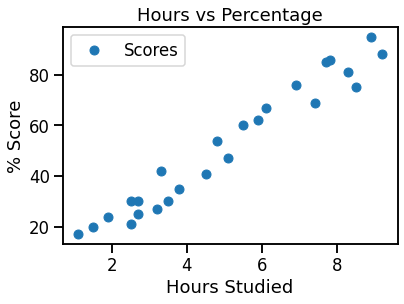

In [9]:
#the scatter plot clearly depicts with increasing hours of study the marks obtained by a student gradually increase
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('% Score')  
plt.show() 

In [10]:
#dividing the data into input attributes and output lables. 
X = df.iloc[:, :-1].values  # input data
y = df.iloc[:, 1].values  # output data
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now that we have identified our attributes and output lables, we divide the data into training set and testing set. The data is divided in a ration 80:20. 

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

Next step is to feed the training data to our algorithm to train it. 


In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression() # object creation  
regressor.fit(X_train, y_train) 
print('Data Trained Successfully')


Data Trained Successfully


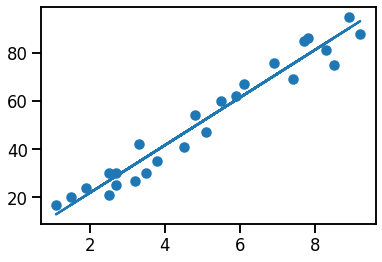

In [13]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Making the predictions

In [14]:
print(X_test) # Testing data
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
# Comparing Actual values vs Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Testing using your own input data

In [16]:
var = [[9.55]]
x_test = var
y_predicted = regressor.predict(x_test)
print("If a student studies for 9.55 hours obtained marks are:", y_predicted)


If a student studies for 9.55 hours obtained marks are: [96.66492943]


Final step is to evaluate the performance of our trained algorithm 

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))
accuracy = metrics.r2_score(y_test, y_pred) 
print('Accuracy of the model is', round(accuracy*100,2),'%')  

Mean Absolute Error: 4.183859899002982
Accuracy of the model is 94.55 %
